# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Diego Espinoza
- Nombre de alumno 2: Juan Miño


### **Link de repositorio de GitHub:** [Laboratorio 5: MDS7202](https://github.com/juansebm/MDS7202)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.




### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*Escriba su respuesta aquí*

1. El conjunto de entrenamiento es la muestra de los datos que se usa para ajustar el modelo (es decir, para ajustar los parámetros de un modelo, como pueden ser los pesos y los sesgos en el caso de un clasificador lineal o de una red neuronal). El modelo ve, y aprende entrenando de estos datos. Por otro lado, el conjunto de validacion se usa para una evaluación no sesgada del ajuste del modelo sobre el conjunto de entrenamiento durante el tuning o afinamiento de los hiperparámetros del modelo. La evaluación se convierte en más sesgada en la medida que la habilidad del conjunto de validación se incorpora en el modelo. También se le llama el conjunto de desarrollo porque ayuda en la etapa de desarrollo del modelo. Entonces la diferencia es que el modelo ocasionalmente ve/mira el conjunto de validación, pero nunca aprende de este mismo, en cambio ve/mira y aprende del conjunto de entrenamiento. Por otro lado, el conjunto de validación se utiliza para evaluar un modelo dado, mientras que el conjunto de entrenamiento para definir los parámetros del modelo. Es decir, el conjunto de entrenamiento se usa para, minimizando la función de pérdida, conocer los parámetros internos del modelo (en el caso de una red neuronal serían los pesos y sesgos), mientras que el conjunto de validacion se usaría para los hiperparámetros (tasa de aprendizaje, profundidad de un árbol, el número de neuronas, etc.). Nos tomamos de esta [página para responder](https://medium.com/data-science/train-validation-and-test-sets-72cb40cba9e7).

2. El principal problema al trabajar con datos no supervisados (es decir, no etiquetados) es que evidentemente no tenemos una variable target que predecir, por lo que a priori no sabemos cómo clasificar. Entonces, dado que en muchas ocasiones tiene un costo alto clasificar manualmente cada uno de los datos de un dataset, es necesario realizar una tarea por ejemplo de clusterización para reconocer los clusters que más se parecen entre sí y propagar dichos labels o etiquetas al dataset original de tal suerte que ahora sí pueda realizar supervised learning, [como por ejemplo se puede hacer en clasificación de texto](https://stackoverflow.com/questions/27860302/is-there-any-way-to-classify-text-without-target-labels).

3. Si en un dataset tenemos varias clases $C_1$, $C_2$, ..., $C_N$, entonces la matriz de confusión $M$ es tal que la entrada $M_{i,j} = x_1$ nos dice que la clase $C_i$ fue clasificada como si fuera de la clase $C_j$ una cantidad $x_1$ de veces. Por lo tanto, la matriz es una forma de resumir todos los falsos positivos o predicciones erróneas realizadas por un modelo en particular. Por lo tanto, se utiliza en trabajos de clasificación (que usa supervised learning).

4. Métricas de supervised learning:
    - Accuracy: Esta métrica mide la proporcion de predicciones correctas hechas por el modelo a lo largo de todo el dataset. Se calcula como la división de verdaderos positivos (TP) y verdaderos negativos sobre el total de muestras (la suma de falsos negativos, falsos positivos, verdaderos positivos y verdaderos negativos): $$A = \frac{TP + TN}{TP + TN + FP + FN}$$
    Entonces esta métrica mide la "correctitud" general del modelo.
    
    - Precision: mide la proporción de predicciones verdaderas positivas sobre todas las predicciones positivas hechas por el modelo, es decir, la división de TP sobre la suma de TP y falsos positivos  FP: $$P = \frac{TP}{TP + FP}$$
    Entonces esta métrica evalua la calidad de la predicción positiva.

    - Recall: también conocido como la sensibilidad o tasa de verdaderos positivos, mide la proporción de predicciones verdaderas positivas sobre todas las posibles instancias positivas. Se calcula como el cuociente entre TP y la suma de verdaderos positivos y falsos negativos: $$R = \frac{TP}{TP + FN}$$.
    Entonces esta métrica mide la sensibilidad a las instancias positivas.
    
    - F1-score: es la métrica que balancea la precision y el racall. Se calcula como la media armónica de precision y recall. El F1 es útil cuando se busca un balance entre alta precision y alto recall, en la medida en que penaliza valores negativos extremos de ambos componentes. Se define como: $$F1-\text{Score} = 2 * \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}$$

5. Diferentes métricas ([usamos la siguiente página](https://klu.ai/glossary/accuracy-precision-recall-f1)):
  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera:
    - aquí definimos dos clases: maquinaria falló y maquinaria no falló. Aquí fallar en detectar una falla real es muy costoso (por seguridad, tiempo detenido, etc.) Lo que más importa es el recall porque necesitamos capturar todos los casos de falla posibles, aunque a veces nos equivoquemos y predigamos una falla que no existe. Por que recall nos relaciona los verdaderos positivos (que son los casos que sí pudimos detectar bien) con los falsos negativos (que son los casos que no eran pero que clasificamos como de la otra clase, es decir, que no eran fallas pero que clasificamos como fallas o que eran fallas pero que clasificamos como si no lo fueran).
  * Detección de enfermedades altamente contagiosas:
    - No detectar a un enfermo es grave (porque contagia a más personas), por lo que es preferible detectar a todos los enfermos (aumentar verdaderos positivos en relación a falsos negativos) y por ende el recall es más importante (incluso si marcamos falsamente a los sanos como enfermos)
  * Aprobación de créditos de alto riesgo:
    - Aquí queremos aprobar un crédito a alguien, lo cual puede ser riesgoso y costoso para el banco, por lo que importa más la precisión, pues queremos que cuando aprobemos un crédito, sea realmente alguien confiable y además es mejor ser estrictos (rechazar algunos buenos) que aprobar alguien malo (solo nos importa si alguien bueno fue clasificado como bueno, y si alguien malo fue clasificado como malo, pero no nos importa si alguien malo fue clasificado como bueno o si alguien bueno fue clasificado como malo).
  * Detección de crímenes:
    - Si no detectamos un crimen real, entonces el criminal queda libre, pero si acusamos falsamente, también el daño será grave (porque se produce un daño a un inocente). Los falsos positivos y falsos negativos: como nos importa tanto los que fueron clasificados como malos siendo inocentes, los inocentes clasificados como malos, podemos usar F1-Score, que nos da una combinación entre precision y recall.

6. La calibración de un modelo de clasificación consiste en reajustar las probabilidades predichas para que correspondan con la proporción de casos reales observados. En otras palabras, corregir las probabilidades predichas por un modelo cuando este las subestima o sobrestima. Entonces un modelo está perfectamente calibrado cuando para cualquier valor p, la clasificación predicha con una confianza o probabilidad de p es correcta el 100 * p por ciento de las veces. Es decir, la clasificación predicha con una confianza de 0.08 es correcta el 80 por ciento de las veces. Para medir qué tan calibrado está un modelo se usa el Brier Score, que es la diferencia cuadrática media entre la probabilidad estimada por el modelo y la probabilidad real. Cuanto menor sea su valor, mejor calibrado será el modelo (al menos esta métrica sirve solo para clasificaciones binarias). Nos ayudamos de esta página para [entenderlo](https://cienciadedatos.net/documentos/py11-calibrar-modelos-machine-learning).

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [3]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/My Drive/stats_players.csv'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

df = pd.read_csv(path)

df


,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [5]:
# 1.
df['label'] = df['National_Position'].notna().astype(int)

conteo_clases = df['label'].value_counts()
print(conteo_clases)


label
0    16513
1     1075
Name: count, dtype: int64


Podemos ver que hay un desbalance "brutal", es decir, hay una desproporción entre las dos clases (16 mil jugadores no fueron seleccionadors de un total de más de 17 mil aprox).

In [6]:
print(df.columns.tolist())


['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height', 'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'label']


In [7]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()

if 'label' in columnas_numericas:
    columnas_numericas.remove('label')

todas_las_columnas = df.columns.tolist()

columnas_categoricas = [
    col for col in todas_las_columnas
    if col not in columnas_numericas + ['label', 'Name']
]


print('Las variables categoricas son: ', ', '.join(columnas_categoricas))
print('Mientras que las variables numéricas son: ', ', '.join(columnas_numericas))

nulos_por_columna = df.isnull().sum()

columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

print('Además, las columnas con nulos y su cantidad de nulos son:')
print(columnas_con_nulos)

# --------------------------------
# CLASES
# --------------------------------

class Imputador_Posicion_Nacional(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Esta función imputa los valores nulos de la columna National_Position
        con los valores no nulos de la columna Club_Position"""
        if 'National_Position' in X.columns and 'Club_Position' in X.columns:
            X['National_Position'] = X['National_Position'].fillna(X['Club_Position'])
        return X

class Imputador_Posicion_Club(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Esta funcion imputa los valores nulos de la columna Club_Position
        con los valores no nulos de la columna National_Position"""
        if 'Club_Position' in X.columns and 'National_Position' in X.columns:
            X['Club_Position'] = X['Club_Position'].fillna(X['National_Position'])
        return X

class Transformador_Total(BaseEstimator, TransformerMixin):
    def __init__(self, columnas_numericas, columnas_categoricas):
        self.columnas_numericas = columnas_numericas
        self.columnas_categoricas = columnas_categoricas
        self.scaler = StandardScaler()
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, X, y=None):
        X_copy = X.copy()

        X_copy = Imputador_Posicion_Nacional().transform(X_copy)
        X_copy = Imputador_Posicion_Club().transform(X_copy)

        #aquí se transforman las columnas
        self.scaler.fit(X_copy[self.columnas_numericas])
        self.encoder.fit(X_copy[self.columnas_categoricas])
        return self

    def transform(self, X):
        """Esta función aplica los imputadores y las transformaciones"""
        X_copy = X.copy()

        X_copy = Imputador_Posicion_Nacional().transform(X_copy)
        X_copy = Imputador_Posicion_Club().transform(X_copy)

        X_scaled = pd.DataFrame(self.scaler.transform(X_copy[self.columnas_numericas]),
                                columns=self.columnas_numericas,
                                index=X_copy.index)

        X_encoded = pd.DataFrame(self.encoder.transform(X_copy[self.columnas_categoricas]),
                                 columns=self.encoder.get_feature_names_out(self.columnas_categoricas),
                                 index=X_copy.index)

        X_final = pd.concat([X_scaled, X_encoded], axis=1)
        return X_final

# --------------------------------
# USO
# --------------------------------

col_transformer = Pipeline([
    ('full_transformer', Transformador_Total(columnas_numericas, columnas_categoricas))
], verbose=True)

df_label = df['label']
df_sin_label = df.drop('label', axis=1)

df_transformed = col_transformer.fit_transform(df_sin_label)

df_transformed = pd.concat([pd.DataFrame(df_transformed, index=df.index), df_label], axis=1)

df_transformed


Las variables categoricas son:  Nationality, National_Position, Club_Position, Preffered_Foot, Work_Rate
Mientras que las variables numéricas son:  Height, Weight, Age, Weak_foot, Skill_Moves, Ball_Control, Dribbling, Marking, Sliding_Tackle, Standing_Tackle, Aggression, Reactions, Interceptions, Vision, Composure, Crossing, Short_Pass, Long_Pass, Acceleration, Speed, Stamina, Strength, Balance, Agility, Jumping, Heading, Shot_Power, Finishing, Long_Shots, Curve, Freekick_Accuracy, Penalties, Volleys
Además, las columnas con nulos y su cantidad de nulos son:
National_Position    16513
Club_Position            1
dtype: int64
[Pipeline] .. (step 1 of 1) Processing full_transformer, total=   0.2s


,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,...,Work_Rate_High / High,Work_Rate_High / Low,Work_Rate_High / Medium,Work_Rate_Low / High,Work_Rate_Low / Low,Work_Rate_Low / Medium,Work_Rate_Medium / High,Work_Rate_Medium / Low,Work_Rate_Medium / Medium,label
0,0.583453,0.688144,1.397344,1.625071,3.614412,2.080706,1.966716,-1.031039,-1.048847,-0.753239,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-1.663748,-0.471654,0.756330,1.625071,2.274171,2.199511,2.231080,-1.448458,-0.909407,-0.890682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,-1.064495,-1.051553,-0.098356,3.149676,3.614412,2.199511,2.178207,-1.077419,-0.584046,-1.073940,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.134013,1.413018,0.970001,1.625071,2.274171,1.961901,1.649479,-0.660000,-0.351645,-0.111837,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.781960,2.427841,1.183672,1.625071,-1.746549,-0.592407,-1.311397,-1.587597,-1.606609,-1.715342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,0.283826,0.978093,-1.380384,-2.948741,-1.746549,-2.730898,-2.315980,-1.494838,-1.560129,-1.577898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
17584,0.583453,0.688144,-1.380384,-1.424137,-1.746549,-2.671496,-2.315980,-1.541217,-1.560129,-1.669527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
17585,-1.214308,-2.066377,-1.594055,-1.424137,-0.406309,-0.830018,-0.835542,-0.196202,-0.769967,-0.569981,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17586,-0.165614,0.688144,-0.953041,0.100467,-1.746549,-2.433886,-2.210235,-1.541217,-1.606609,-1.532084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


1. Imputación: Lo que en realidad hicimos fue definir tres clases. Las primeras dos llamadas "Imputador_Posicion_Club" y "Imputador_Posicion_Nacional" imputan con los valores de la columna National_Club y Position_Club respectivamente, y los imputamos así porque tienen las mismas clases en ambos (en ambas columnas categóricas, podemos ver que están presentes las clases 'Sub', 'LCB', 'GK', 'RCB', 'LB' y otras más). Además, solo imputamos valores aquí porque en ambas (que son las posiciones en las que juegan los profesionales) hay 16513 y 1 valores nulos.

2. Transformación: para las variables numéricas aplicamos StandardScaler para estandarizar las variables numericas y aplicamos OneHotEncoder para transformar las variables categóricas. Lo importante es que usamos OnehotEncoder porque no importa, porque la cantidad de columnas es pequeña en comparcion con la cantidad de datos (264 en comparación con 17 mil, que es menos de una parte entre 65 mil). Además, definimos una tercera clase que iba usando las dos primeras dos clases de los imputadores, y luego el transformador simplemente se definía como col_transformer como pipeline.


### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [8]:
from sklearn.model_selection import train_test_split

# 1. Separamos los datos en un conjunto de entrenamiento y de prueba.
X = df_transformed.drop('label', axis=1)
y = df_transformed['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 80% entrenamiento, 20% prueba.
    random_state=42,  # con esto garantizamos reproducibilidad.
    stratify=y       # esto asegura que la distribución de las clases sea semejante en ambos conjuntos.
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

print("\nDistribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())

print("\nDistribución de clases en el conjunto de prueba:")
print(y_test.value_counts())


Tamaño del conjunto de entrenamiento: (14070, 264)
Tamaño del conjunto de prueba: (3518, 264)

Distribución de clases en el conjunto de entrenamiento:
label
0    13210
1      860
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
label
0    3303
1     215
Name: count, dtype: int64


In [9]:
import struct
print(struct.calcsize("P") * 8)

64


In [10]:
import platform
print(platform.architecture())


('64bit', 'ELF')


In [11]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import lightgbm as lgb


xgboost_model = XGBClassifier(random_state=42)
lightgbm_model = lgb.LGBMClassifier(random_state=42)

pipeline_xgboost = Pipeline([
    ('full_transformer', Transformador_Total(columnas_numericas, columnas_categoricas)),
    ('xgboost', xgboost_model)
])

pipeline_lightgbm = Pipeline([
    ('full_transformer', Transformador_Total(columnas_numericas, columnas_categoricas)),
    ('lightgbm', lightgbm_model)
])

In [33]:
print("Columnas en X_train:", X_train.columns)

print("Columnas numéricas:", columnas_numericas)
print("Columnas categóricas:", columnas_categoricas)

Columnas en X_train: Index(['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
       'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
       'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
       'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
       'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading',
       'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy',
       'Penalties', 'Volleys'],
      dtype='object')
Columnas numéricas: ['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']
Columnas categóricas: ['Nationality'

In [13]:
pipeline_xgboost = Pipeline([
    ('xgboost', xgboost_model)
])

pipeline_lightgbm = Pipeline([
    ('lightgbm', lightgbm_model)
])

# Entrenamiento con datos ya transformados
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2728
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('lightgbm', LGBMClassifier(random_state=42))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

print("Resultados XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgboost))
print("Precisión clase positiva:", precision_score(y_test, y_pred_xgboost, pos_label=1))
print("Recall clase positiva:", recall_score(y_test, y_pred_xgboost, pos_label=1))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_xgboost, digits=4))

print("\n" + "="*50 + "\n")

print("Resultados LightGBM")
print("Accuracy:", accuracy_score(y_test, y_pred_lightgbm))
print("Precisión clase positiva:", precision_score(y_test, y_pred_lightgbm, pos_label=1))
print("Recall clase positiva:", recall_score(y_test, y_pred_lightgbm, pos_label=1))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_lightgbm, digits=4))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2728
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797
Resultados XGBoost
Accuracy: 0.9752700397953382
Precisión clase positiva: 0.9324324324324325
Recall clase positiva: 0.641860465116279

Reporte de clasificación:
               precision    recall  f1-score   support

           0     0.9772    0.9970    0.9870      3303
           1     0.9324    0.6419    0.7603       215

    accuracy                         

Nosotros queremos priorizar lo siguiente: el recall de la clase 1 (jugadores seleccionados), y usamos también el F1-score dado que nos interesa un balance entre detectar bien a los jugadores y no inflar los resultados con falsos positivos.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [15]:
import pandas as pd

posiciones = {
    'ST': 'ataque', 'CF': 'ataque',
    'RW': 'central_ataque', 'CAM': 'central_ataque', 'LW': 'central_ataque',
    'RM': 'central', 'CM': 'central', 'LM': 'central',
    'RWB': 'central_defensa', 'CDM': 'central_defensa', 'LWB': 'central_defensa',
    'RB': 'defensa', 'CB': 'defensa', 'LB': 'defensa',
    'GK': 'arquero'
}

df_filtrado = df[~df['Club_Position'].isin(['Sub', 'Res'])].copy()

df_filtrado['label'] = df_filtrado['Club_Position'].map(posiciones)

print(df_filtrado[['Club_Position', 'label']].head())

  Club_Position           label
0            LW  central_ataque
1            RW  central_ataque
2            LW  central_ataque
3            ST          ataque
4            GK         arquero


In [16]:
conteo_clases = df_filtrado['label'].value_counts()

print(conteo_clases)

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

df_filtrado = df_filtrado.dropna(subset=['Club_Position', 'label'])

X = df_filtrado.drop(columns=['label'])  # Eliminamos la columna objetivo
y = df_filtrado['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

pipeline = Pipeline([
    ('transformacion', Transformador_Total(columnas_numericas, columnas_categoricas)),
    ('clasificador', LGBMClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2468
[LightGBM] [Info] Number of data points in the train set: 3151, number of used features: 106
[LightGBM] [Info] Start training from score -1.828938
[LightGBM] [Info] Start training from score -2.214833
[LightGBM] [Info] Start training from score -1.469303
[LightGBM] [Info] Start training from score -1.913438
[LightGBM] [Info] Start training from score -2.937481
[LightGBM] [Info] Start training from score -1.205349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

Pipeline(steps=[('transformacion',
                 Transformador_Total(columnas_categoricas=['Nationality',
                                                           'National_Position',
                                                           'Club_Position',
                                                           'Preffered_Foot',
                                                           'Work_Rate'],
                                     columnas_numericas=['Height', 'Weight',
                                                         'Age', 'Weak_foot',
                                                         'Skill_Moves',
                                                         'Ball_Control',
                                                         'Dribbling', 'Marking',
                                                         'Sliding_Tackle',
                                                         'Standing_Tackle',
                                                         'Aggression',
                                                         'Reactions',
                                                         'Interceptions',
                                                         'Vision', 'Composure',
                                                         'Crossing',
                                                         'Short_Pass',
                                                         'Long_Pass',
                                                         'Acceleration',
                                                         'Speed', 'Stamina',
                                                         'Strength', 'Balance',
                                                         'Agility', 'Jumping',
                                                         'Heading',
                                                         'Shot_Power',
                                                         'Finishing',
                                                         'Long_Shots', 'Curve', ...])),
                ('clasificador', LGBMClassifier(random_state=42))])

In [18]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Reporte de clasificación:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       1.00      1.00      1.00        86
        central       1.00      1.00      1.00       182
 central_ataque       1.00      1.00      1.00       116
central_defensa       1.00      1.00      1.00        42
        defensa       1.00      1.00      1.00       236

       accuracy                           1.00       788
      macro avg       1.00      1.00      1.00       788
   weighted avg       1.00      1.00      1.00       788



Como podemos ver, hay un precision, recall y f1-score de 1 para todas las clases de la columna label, lo que indica evidentemente que hay sobreajuste (probablemente en algún momento fallamos en algun paso del modelo LBMClassifier)

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

#### 1

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [20]:
# !pip install pycaret

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from pycaret.classification import *


position_groups = {
    'ataque': ['ST', 'CF'],
    'central_ataque': ['RW', 'CAM', 'LW'],
    'central': ['RM', 'CM', 'LM'],
    'central_defensa': ['RWB', 'CDM', 'LWB'],
    'defensa': ['RB', 'CB', 'LB']
}

valid_positions = [pos for group in position_groups.values() for pos in group]
df = df[df['Club_Position'].isin(valid_positions)].copy()

df['label'] = df['Club_Position'].apply(
    lambda x: next((k for k, v in position_groups.items() if x in v), None)
)
df = df.dropna(subset=['label'])

data = df.drop('Club_Position', axis=1)

In [22]:
#pip install catboost

In [23]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"


clf = setup(
    data=data,  # ✅ Aquí estamos usando el df limpio sin Club_Position
    target='label',
    session_id=123,
    fold_strategy='kfold',
    fold=5,
    verbose=False,
    use_gpu=False,  # ⚠️ ponemos False si no estás en Colab con GPU de NVIDIA
    log_experiment=False
)

modelos_arbol = ['et', 'rf', 'dt', 'xgboost', 'lightgbm'] # catboost NO DISPONIBLE!

best_model = compare_models(include=modelos_arbol, sort='F1')  # Buscamos balance entre precision y recall

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.3232,0.8251,0.3232,0.4799,0.2659,0.1745,0.2249,2.2520
rf,Random Forest Classifier,0.2433,0.7545,0.2433,0.5051,0.1422,0.1166,0.1580,0.5500
dt,Decision Tree Classifier,0.1763,0.5005,0.1763,0.1746,0.0544,0.0009,0.0125,0.1600
xgboost,Extreme Gradient Boosting,0.1763,0.7172,0.1763,0.1746,0.0544,0.0009,0.0125,0.3900
lightgbm,Light Gradient Boosting Machine,0.1763,0.6665,0.1763,0.1746,0.0544,0.0009,0.0125,3.5040


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [25]:
print(df_filtrado.shape)
print(df_filtrado['label'].value_counts())


(3939, 40)
label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


#### 2

*Decision Tree (Árbol de Decisión):*
Es un modelo que clasifica datos dividiéndolos de forma jerárquica mediante condiciones como "¿X > umbral?". Utiliza métricas como Gini o Entropía para elegir las divisiones. Es fácil de interpretar, pero puede sobreajustarse si no se limita su profundidad.

*Random Forest:*
Consiste en múltiples árboles de decisión entrenados sobre subconjuntos aleatorios de los datos y características. Combina sus predicciones por votación mayoritaria, lo que reduce el sobreajuste y mejora la precisión.

*Extra Trees:*
Es similar a Random Forest, pero introduce aún más aleatoriedad al seleccionar divisiones de forma aleatoria en vez de óptima. Esto permite entrenamientos más rápidos y, en algunos casos, mejor generalización, aunque con posible pérdida leve de precisión.

#### 3

*El mejor modelo fue Extra Trees Classifier, ya que obtuvo los valores más altos en todas las métricas clave: Accuracy (0.3232), AUC (0.8251), Recall (0.3232), y especialmente F1 Score (0.2659), lo que indica un buen balance entre precisión y sensibilidad. Además, su MCC de 0.2249 y Kappa de 0.1745 superan ampliamente al resto, lo que confirma que logra una mejor discriminación entre clases. Aunque su tiempo de entrenamiento fue más alto, el desempeño global justifica su elección como el modelo más robusto para esta tarea.*

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

#### 1

**Respuesta**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
from xgboost import XGBClassifier


position_groups = {
    'ataque': ['ST', 'CF'],
    'central_ataque': ['RW', 'CAM', 'LW'],
    'central': ['RM', 'CM', 'LM'],
    'central_defensa': ['RWB', 'CDM', 'LWB'],
    'defensa': ['RB', 'CB', 'LB']
}

valid_positions = [pos for v in position_groups.values() for pos in v]
df = df[df['Club_Position'].isin(valid_positions)].copy()

df['label'] = df['Club_Position'].apply(lambda x: next(k for k, v in position_groups.items() if x in v))

le = LabelEncoder()
y = le.fit_transform(df['label'])

drop_cols = ['Club_Position', 'label', 'Name', 'Nationality', 'National_Position', 'Preffered_Foot', 'Work_Rate', 'Body_Type', 'Real_Face', 'Position', 'Joined', 'Loaned_From', 'Contract_Valid_Until', 'Best_Position']
X = df.drop(columns=drop_cols, errors='ignore')

for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Split :o
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entrenamos el modelo
model_full = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_full.fit(X_train, y_train)

# Evaluamos el desempeño
y_pred_full = model_full.predict(X_test)
print("Modelo original:\n", classification_report(y_test, y_pred_full))


Modelo original:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        86
           1       0.58      0.64      0.61       182
           2       0.48      0.38      0.42       116
           3       0.63      0.29      0.39        42
           4       0.85      0.94      0.89       236

    accuracy                           0.71       662
   macro avg       0.67      0.62      0.63       662
weighted avg       0.69      0.71      0.70       662



#### 2

In [28]:
import numpy as np

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model_full.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance.head(10))


            feature  importance
8    Sliding_Tackle    0.224784
27        Finishing    0.060838
7           Marking    0.059455
25          Heading    0.047663
15         Crossing    0.045030
13           Vision    0.043964
9   Standing_Tackle    0.030099
16       Short_Pass    0.027484
17        Long_Pass    0.026890
19            Speed    0.026389


#### 3

In [29]:
scores = []

for n in range(5, len(feature_importance)+1, 5):
    top_features = feature_importance['feature'].iloc[:n].tolist()
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    model.fit(X_train[top_features], y_train)
    preds = model.predict(X_test[top_features])
    score = f1_score(y_test, preds, average='weighted')
    scores.append((n, score))

for n, score in scores:
    print(f"{n} features → F1 Score: {score:.4f}")


5 features → F1 Score: 0.6223
10 features → F1 Score: 0.6984
15 features → F1 Score: 0.6829
20 features → F1 Score: 0.6997
25 features → F1 Score: 0.6684
30 features → F1 Score: 0.6857


#### 4

In [30]:
top_n = 20
selected_features = feature_importance['feature'].iloc[:top_n].tolist()

model_reduced = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_reduced.fit(X_train[selected_features], y_train)

y_pred_reduced = model_reduced.predict(X_test[selected_features])
print("Modelo reducido:\n", classification_report(y_test, y_pred_reduced))


Modelo reducido:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        86
           1       0.61      0.64      0.63       182
           2       0.47      0.40      0.43       116
           3       0.71      0.24      0.36        42
           4       0.84      0.95      0.89       236

    accuracy                           0.72       662
   macro avg       0.69      0.63      0.63       662
weighted avg       0.70      0.72      0.70       662



#### 5

- ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original?

Sí, el rendimiento del modelo reducido fue comparable al modelo original. El F1 Score se mantuvo estable con solo 20 características, lo que sugiere que las variables eliminadas aportaban poca información adicional.

- ¿Cuáles son los beneficios potenciales de eliminar variables del modelo?

Eliminar variables reduce la complejidad del modelo, acelera el tiempo de entrenamiento y disminuye el riesgo de sobreajuste. También permite un uso más eficiente de recursos computacionales.

- ¿El modelo con menor dimensionalidad es más sencillo de explicar?

Sí. Un modelo con menos variables es más fácil de entender, visualizar y justificar ante personas no técnicas. Al reducir el número de características, se puede identificar más claramente qué factores son clave en la toma de decisiones del modelo.


### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import StratifiedKFold

Brier Score (sin calibrar): 0.0869
Brier Score (calibrado): 0.0785


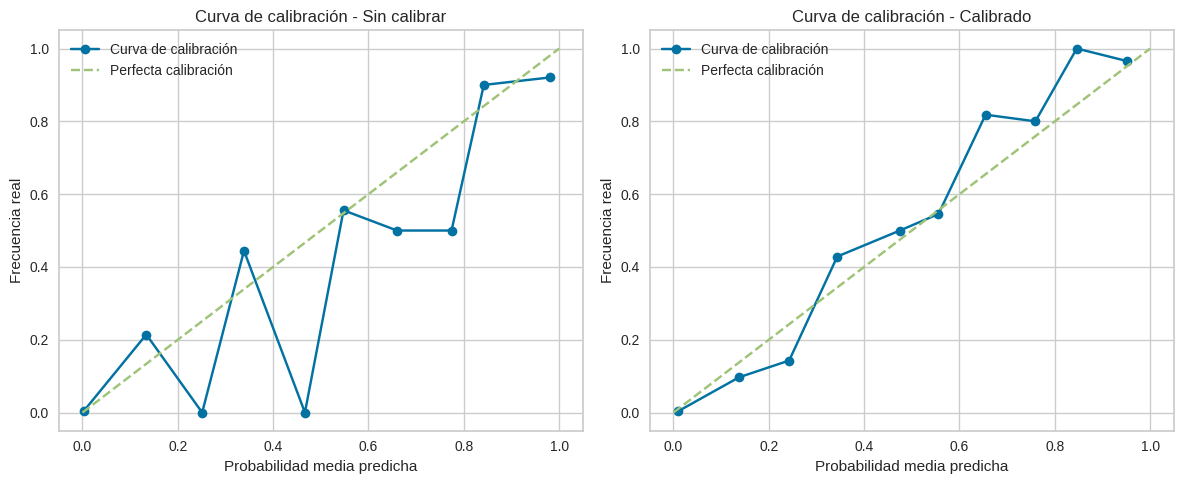

In [32]:
# Obtenemos probs
y_proba_orig = model_full.predict_proba(X_test)

# Calculamos Brier Score para cada clase (promedio macro)
brier_original = np.mean([
    brier_score_loss((y_test == i).astype(int), y_proba_orig[:, i])
    for i in np.unique(y_test)
])
print(f"Brier Score (sin calibrar): {brier_original:.4f}")

# Calibramos el modelo con isotonic regression (asegurar monotonía)
calibrator = CalibratedClassifierCV(model_full, method='isotonic', cv=StratifiedKFold(n_splits=5))
calibrator.fit(X_train, y_train)

# Obtenemos nuevas probs
y_proba_calibrated = calibrator.predict_proba(X_test)

# Calculamos Brier Score para el modelo - calibrado - !!!
brier_calibrated = np.mean([
    brier_score_loss((y_test == i).astype(int), y_proba_calibrated[:, i])
    for i in np.unique(y_test)
])
print(f"Brier Score (calibrado): {brier_calibrated:.4f}")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i, model_name, y_proba in zip(
    [0, 1],
    ['Sin calibrar', 'Calibrado'],
    [y_proba_orig, y_proba_calibrated]
):
    prob_true, prob_pred = calibration_curve((y_test == 0).astype(int), y_proba[:, 0], n_bins=10)
    ax[i].plot(prob_pred, prob_true, marker='o', label='Curva de calibración')
    ax[i].plot([0, 1], [0, 1], linestyle='--', label='Perfecta calibración')
    ax[i].set_title(f'Curva de calibración - {model_name}')
    ax[i].set_xlabel("Probabilidad media predicha")
    ax[i].set_ylabel("Frecuencia real")
    ax[i].legend()

plt.tight_layout()
plt.show()


Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>